In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
from load_data import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
df=load()

In [5]:
df.head(10)

,RegionID,SizeRankZip,RegionName,RegionType,State,City,Metro,CountyName,ZHVI 2003,ZHVI 2008,...,Transit Jobs,Transit Trips/Week,Transit Routes,Transit Shed (sq mi),Transit percentage,Population,Unnamed: 0,STATEFP,COUNTYFP,NatWalkInd
0,91982,1,77494,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,215776.356117,244120.000781,...,56,40,0.0,0.0,0.013,"24,783",38085.0,48.0,157.0,7.968900
1,91940,3,77449,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111490.450128,124187.861811,...,56,40,0.0,0.0,0.013,"24,783",38107.0,48.0,201.0,11.430193
2,91733,5,77084,zip,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,109631.516990,123577.558321,...,"218,774","1,900",5.0,31.0,0.039,"2,439,835",38107.0,48.0,201.0,11.430193
3,91926,11,77433,zip,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,197878.948831,221744.762112,...,NaN,NaN,NaN,NaN,NaN,NaN,38107.0,48.0,201.0,11.430193
4,92036,25,77573,zip,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County,159151.702851,190430.187900,...,NaN,NaN,NaN,NaN,NaN,NaN,38090.0,48.0,167.0,7.878866
5,91968,51,77479,zip,TX,Sugar Land,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,244414.374629,283323.404144,...,NaN,NaN,NaN,NaN,NaN,NaN,38085.0,48.0,157.0,7.968900
6,91922,62,77429,zip,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,163125.610550,187884.169987,...,NaN,NaN,NaN,NaN,NaN,NaN,38107.0,48.0,201.0,11.430193
7,92045,75,77584,zip,TX,Pearland,"Houston-The Woodlands-Sugar Land, TX",Brazoria County,181722.812581,203321.328568,...,417,20,0.0,0.0,0.003,"114,122",38026.0,48.0,39.0,6.298689
8,91889,88,77379,zip,TX,Spring,"Houston-The Woodlands-Sugar Land, TX",Harris County,164893.900219,186980.525226,...,0,0,0.0,0.0,0.013,"55,243",38107.0,48.0,201.0,11.430193
9,91950,120,77459,zip,TX,Missouri City,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,188558.030624,212994.995651,...,"8,336",193,1.0,3.0,0.013,"79,219",38085.0,48.0,157.0,7.968900


In [6]:
df.nunique()

RegionID       13293
SizeRankZip     9472
RegionName     13293
RegionType         1
State             48
               ...  
Population      1280
Unnamed: 0      1578
STATEFP           48
COUNTYFP         210
NatWalkInd      1464
Length: 64, dtype: int64

In [7]:
print(df.columns.tolist())

['RegionID', 'SizeRankZip', 'RegionName', 'RegionType', 'State', 'City', 'Metro', 'CountyName', 'ZHVI 2003', 'ZHVI 2008', 'ZHVI 2013', 'ZHVI 2018', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021', 'ZHVI 2022', 'ZHVI 2023', 'ZHVF BaseDate', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30', 'ZHVF 2025-01-31', 'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021', 'ZORI 2022', 'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019', 'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022', 'Sale Listings 2023', 'Sales 2013', 'Sales 2018', 'Sales 2019', 'Sales 2020', 'Sales 2021', 'Sales 2022', 'Sales 2023', 'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021', 'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018', 'New Construction 2019', 'New Construction 2020', 'New Construction 2021', 'New Construction 2022', 'New Construction 2023', 'Transit Rank', 'Transit Score', 'Transit TCI', 'Transit Jobs', 'Transit Trips/Week', 'Transit Routes', 'Transit Shed (sq mi)', 'Transit percentage

In [8]:
df_2019 = df[['ZHVI 2019','ZORI 2019','Sales 2019','Sale Listings 2019','Days on Market 2019','New Construction 2019','Transit Score','RegionID','RegionName','SizeRankZip','State','City','Population','NatWalkInd']]

In [9]:
df_2019 = df_2019.dropna(subset=['ZHVI 2019','ZORI 2019','Sales 2019','Sale Listings 2019','Days on Market 2019','New Construction 2019','Transit Score','RegionID','RegionName','SizeRankZip','State','City','Population','NatWalkInd'])
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 7451
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ZHVI 2019              1167 non-null   float64
 1   ZORI 2019              1167 non-null   float64
 2   Sales 2019             1167 non-null   float64
 3   Sale Listings 2019     1167 non-null   float64
 4   Days on Market 2019    1167 non-null   float64
 5   New Construction 2019  1167 non-null   float64
 6   Transit Score          1167 non-null   float64
 7   RegionID               1167 non-null   int64  
 8   RegionName             1167 non-null   int64  
 9   SizeRankZip            1167 non-null   int64  
 10  State                  1167 non-null   object 
 11  City                   1167 non-null   object 
 12  Population             1167 non-null   object 
 13  NatWalkInd             1167 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 136.8+ 

In [11]:
sales_2019_by_state = df_2019.groupby('State')['Sale Listings 2019'].sum()

# Sorting the states based on sales listings
top_5_states = sales_2019_by_state.sort_values(ascending=False).head(5)
top_5_states 

State
NY    7.073939e+06
CA    4.709782e+06
TX    4.412735e+06
IL    2.219080e+06
FL    1.617509e+06
Name: Sale Listings 2019, dtype: float64

In [12]:
sales_2019 = df_2019.groupby('State')['Sales 2019'].sum()

# Sorting the states based on sales listings
top_5_states = sales_2019.sort_values(ascending=False).head(5)
top_5_states 

State
CA    1.435393e+06
NY    1.348426e+06
TX    1.014749e+06
IL    6.005600e+05
FL    4.830440e+05
Name: Sales 2019, dtype: float64

In [17]:
# Create an empty DataFrame to store the results
top_10_cities_all_states = pd.DataFrame()

# List of states
states = ['NY','CA', 'TX', 'IL', 'FL']

# Iterate through each state
for state in states:
    # Filter the data for the current state
    state_df = df_2019[df_2019['State'] == state]
    
    # Sort the filtered data by 'Sale Listings 2019' column in descending order
    sorted_state_df = state_df.sort_values(by='Sale Listings 2019', ascending=False)
    
    # Select the top 10 cities for the current state
    top_10_cities_state = sorted_state_df.head(10)
    
    # Concatenate the results with the overall DataFrame
    top_10_cities_all_states = pd.concat([top_10_cities_all_states, top_10_cities_state])

# Print the top 10 cities for all states
print(top_10_cities_all_states[['State', 'City', 'Sale Listings 2019']])


     State             City  Sale Listings 2019
220     NY         New York        87222.083333
362     NY         New York        87222.083333
359     NY         New York        87222.083333
355     NY         New York        87222.083333
352     NY         New York        87222.083333
350     NY         New York        87222.083333
340     NY         New York        87222.083333
337     NY         New York        87222.083333
336     NY         New York        87222.083333
328     NY         New York        87222.083333
686     CA          Norwalk        28671.666667
892     CA      Los Angeles        28671.666667
896     CA      Los Angeles        28671.666667
897     CA      Los Angeles        28671.666667
902     CA      Los Angeles        28671.666667
904     CA        Inglewood        28671.666667
905     CA      Los Angeles        28671.666667
690     CA        Hawthorne        28671.666667
910     CA     Santa Monica        28671.666667
912     CA      Los Angeles        28671

In [21]:
# Create an empty DataFrame to store the results
sales_top_10_cities_all_states = pd.DataFrame()

# List of states
states = ['CA','NY',  'TX', 'IL', 'FL']

# Iterate through each state
for state in states:
    # Filter the data for the current state
    state_df = df_2019[df_2019['State'] == state]
    
    # Sort the filtered data by 'Sale Listings 2019' column in descending order
    sorted_state_df = state_df.sort_values(by='Sales 2019', ascending=False)
    
    # Select the top 10 cities for the current state
    sales_top_10_cities_state = sorted_state_df.head(10)
    
    # Concatenate the results with the overall DataFrame
    sales_top_10_cities_all_states = pd.concat([sales_top_10_cities_all_states, sales_top_10_cities_state])

# Print the top 10 cities for all states
print(sales_top_10_cities_all_states[['State', 'City', 'Sales 2019']])


     State             City    Sales 2019
686     CA          Norwalk   8770.250000
892     CA      Los Angeles   8770.250000
896     CA      Los Angeles   8770.250000
897     CA      Los Angeles   8770.250000
902     CA      Los Angeles   8770.250000
904     CA        Inglewood   8770.250000
905     CA      Los Angeles   8770.250000
690     CA        Hawthorne   8770.250000
910     CA     Santa Monica   8770.250000
912     CA      Los Angeles   8770.250000
220     NY         New York  16617.083333
362     NY         New York  16617.083333
359     NY         New York  16617.083333
355     NY         New York  16617.083333
352     NY         New York  16617.083333
350     NY         New York  16617.083333
340     NY         New York  16617.083333
337     NY         New York  16617.083333
336     NY         New York  16617.083333
328     NY         New York  16617.083333
1549    TX       Fort Worth   7775.666667
1515    TX       Fort Worth   7775.666667
1512    TX    Grand Prairie   7775

In [35]:
scaler = StandardScaler().fit(df_2019[['Transit Score','ZHVI 2019']])
data_scaled = scaler.transform(df_2019[['Transit Score','ZHVI 2019']])
transitscore2019_scaled = data_scaled[:, 0]
zhvi2019_scaled = data_scaled[:, 1]

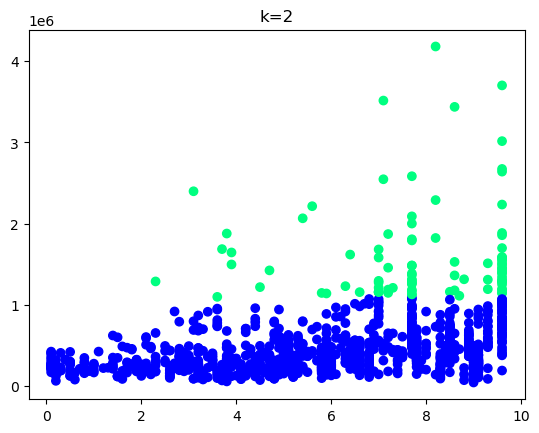

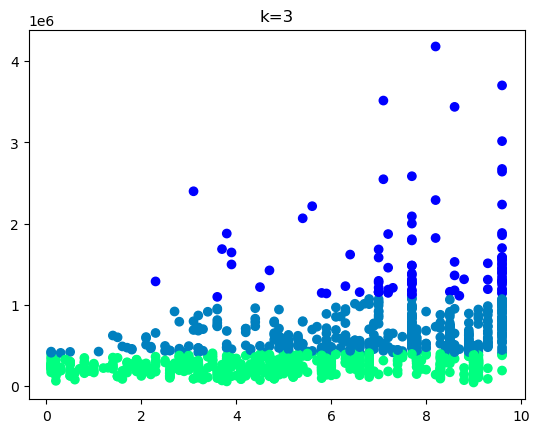

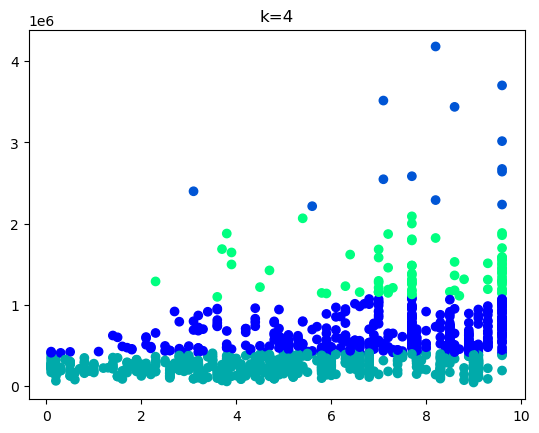

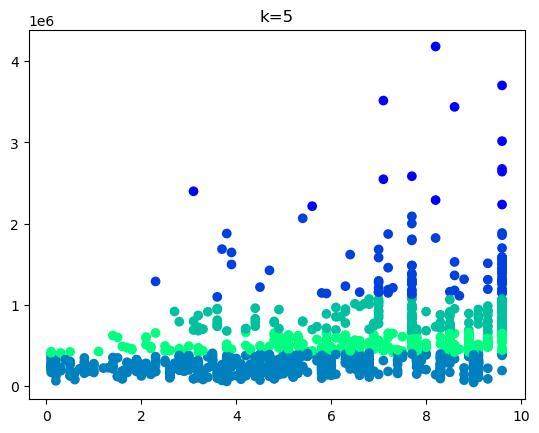

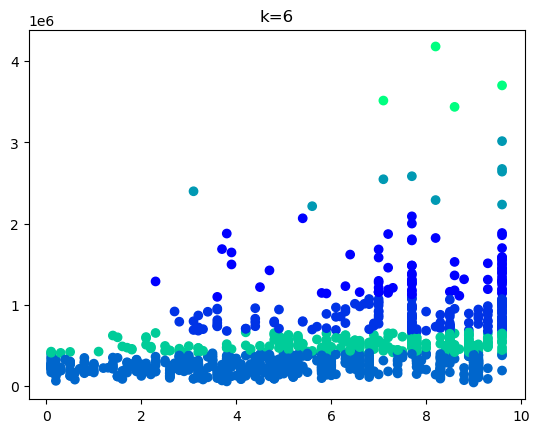

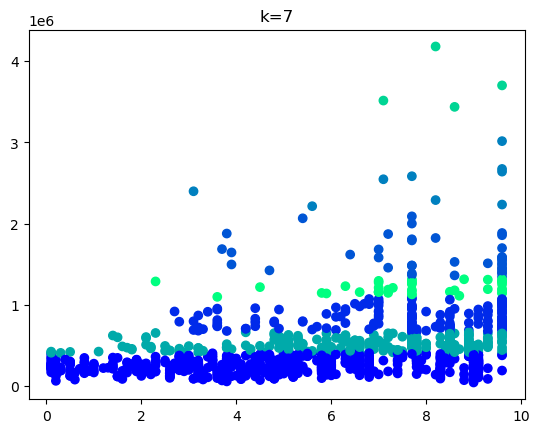

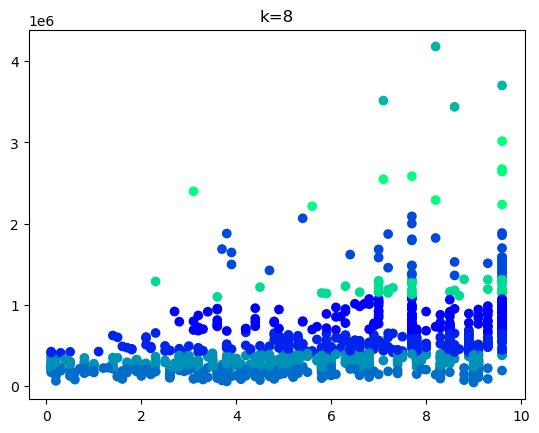

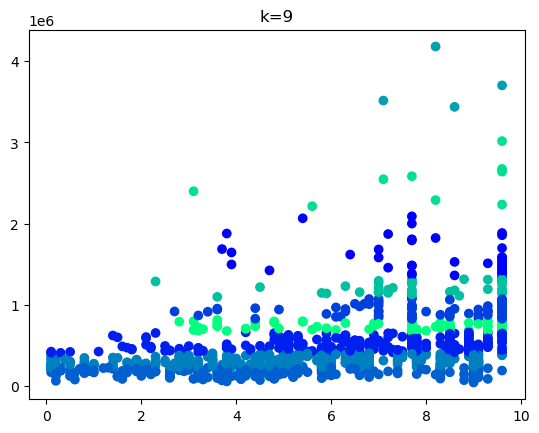

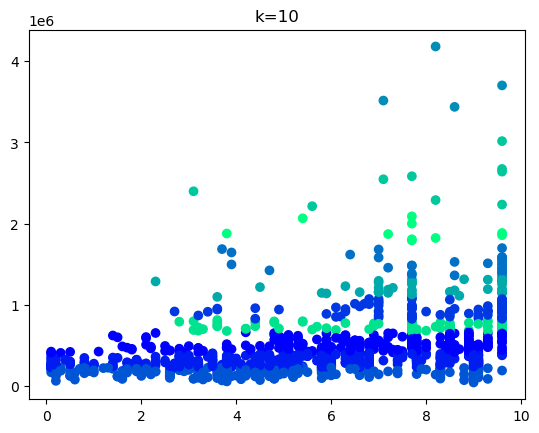

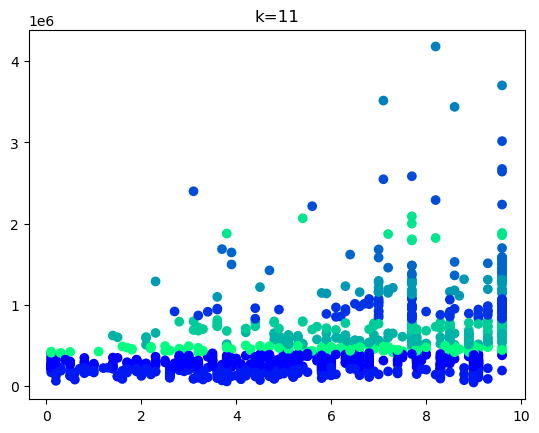

<Figure size 640x480 with 0 Axes>

In [24]:
for k in range(2, 12):
    plt.scatter(df_2019['Transit Score'], df_2019['ZHVI 2019'],
           c = AgglomerativeClustering(n_clusters = k).fit_predict(df_2019[['Transit Score', 'ZHVI 2019']]), cmap =plt.cm.winter)
    plt.title(f"k={k}")
    plt.show()
    plt.clf()

In [26]:
for k in range(2, 12
              ):
    print(f"k={k}")
    clusters = AgglomerativeClustering(n_clusters = k).fit_predict(df_2019[['Transit Score','ZHVI 2019']])
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print("==========")

k=2
Cluster 0 count: 1076
Cluster 1 count: 91
k=3
Cluster 0 count: 91
Cluster 1 count: 408
Cluster 2 count: 668
k=4
Cluster 0 count: 408
Cluster 1 count: 13
Cluster 2 count: 668
Cluster 3 count: 78
k=5
Cluster 0 count: 13
Cluster 1 count: 78
Cluster 2 count: 668
Cluster 3 count: 155
Cluster 4 count: 253
k=6
Cluster 0 count: 78
Cluster 1 count: 155
Cluster 2 count: 668
Cluster 3 count: 9
Cluster 4 count: 253
Cluster 5 count: 4
k=7
Cluster 0 count: 668
Cluster 1 count: 155
Cluster 2 count: 38
Cluster 3 count: 9
Cluster 4 count: 253
Cluster 5 count: 4
Cluster 6 count: 40
k=8
Cluster 0 count: 155
Cluster 1 count: 253
Cluster 2 count: 38
Cluster 3 count: 309
Cluster 4 count: 359
Cluster 5 count: 4
Cluster 6 count: 40
Cluster 7 count: 9
k=9
Cluster 0 count: 38
Cluster 1 count: 253
Cluster 2 count: 81
Cluster 3 count: 309
Cluster 4 count: 359
Cluster 5 count: 4
Cluster 6 count: 40
Cluster 7 count: 9
Cluster 8 count: 74
k=10
Cluster 0 count: 253
Cluster 1 count: 359
Cluster 2 count: 81
Cluster

In [27]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

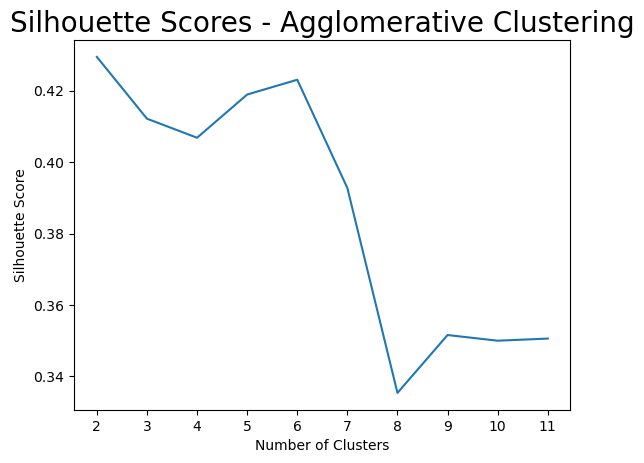

In [39]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Scale the features using StandardScaler
scaler = StandardScaler().fit(df_2019[['Transit Score', 'ZHVI 2019']])
data_scaled = scaler.transform(df_2019[['Transit Score', 'ZHVI 2019']])

n_clusters = np.arange(2, 12)
sils = []
sils_err = []
iterations = 5

for n in n_clusters:
    tmp_sil = []
    for _ in range(iterations):
        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(n_clusters=n).fit(data_scaled)
        labels = agg_clustering.labels_
        sil = silhouette_score(data_scaled, labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(tmp_sil)
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores - Agglomerative Clustering", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

<Axes: xlabel='ZHVI 2019', ylabel='ZORI 2019'>

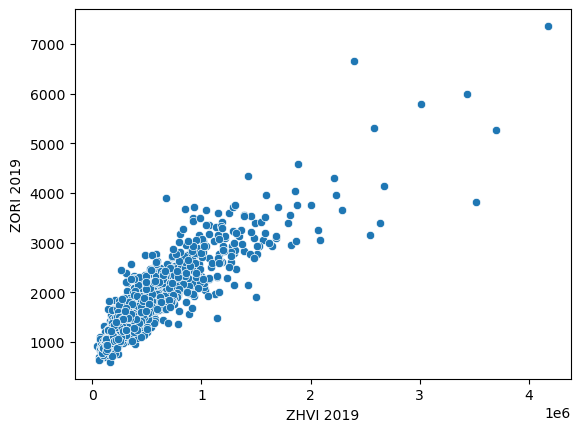

In [22]:
sns.scatterplot(df, x="ZHVI 2019", y="ZORI 2019")

In [ ]:
#More the value of the house more is the observed rent 

<Axes: xlabel='ZHVI 2019', ylabel='Sales 2019'>

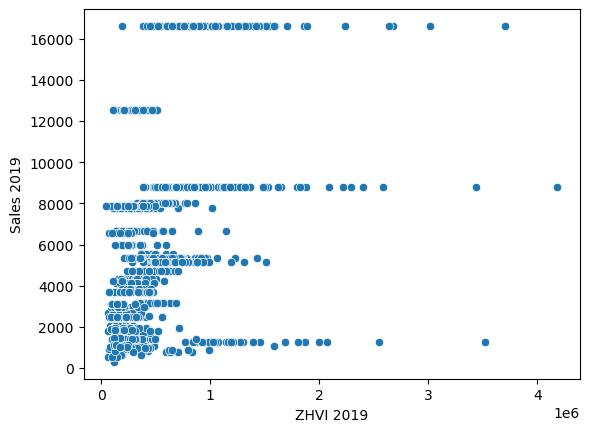

In [24]:
sns.scatterplot(df, y="Sales 2019", x= "ZHVI 2019")

<Axes: xlabel='Sales 2019', ylabel='Count'>

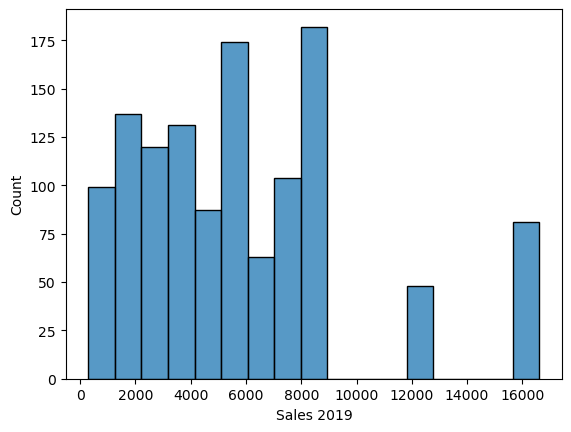

In [26]:
sns.histplot(df, x="Sales 2019")

<Axes: xlabel='ZHVI 2019', ylabel='Count'>

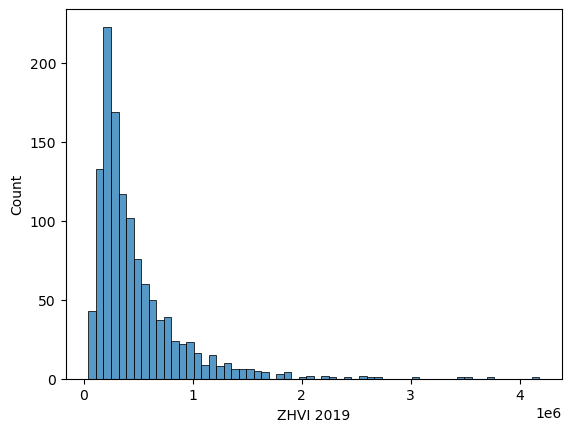

In [27]:
sns.histplot(df, x="ZHVI 2019")

<Axes: xlabel='ZORI 2019', ylabel='Count'>

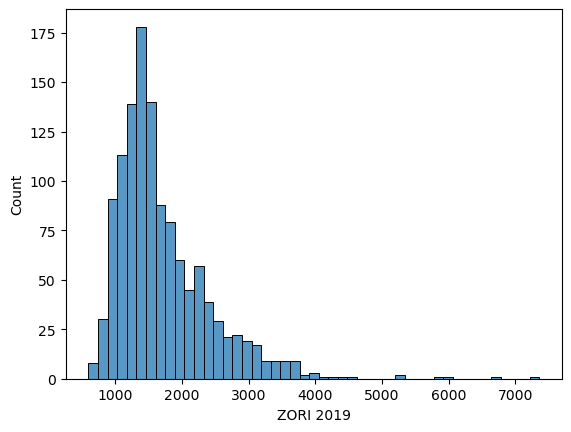

In [28]:
sns.histplot(df, x="ZORI 2019")

In [35]:
ZHVI2019_zscores = zscore(df["ZHVI 2019"])
SALES2019_zscores = zscore(df["Sales 2019"])

<Axes: xlabel='ZHVI 2019', ylabel='Sales 2019'>

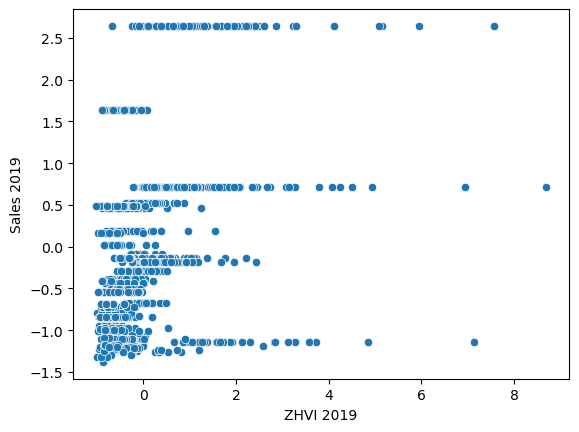

In [36]:
sns.scatterplot(x=ZHVI2019_zscores, y=SALES2019_zscores)

In [30]:
scaler = StandardScaler().fit(df_2019[['ZHVI 2019', 'Sales 2019']])
data_scaled = scaler.transform(df_2019[['ZHVI 2019', 'Sales 2019']])
zhvi2019_scaled = data_scaled[:, 0]
sales2019_scaled = data_scaled[:, 1]


<Axes: >

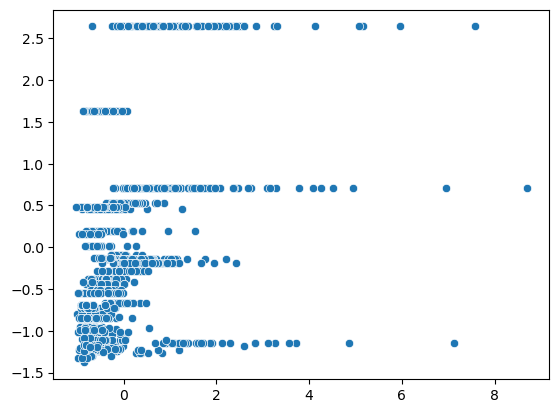

In [40]:
sns.scatterplot(x=zhvi2019_scaled , y=sales2019_scaled)

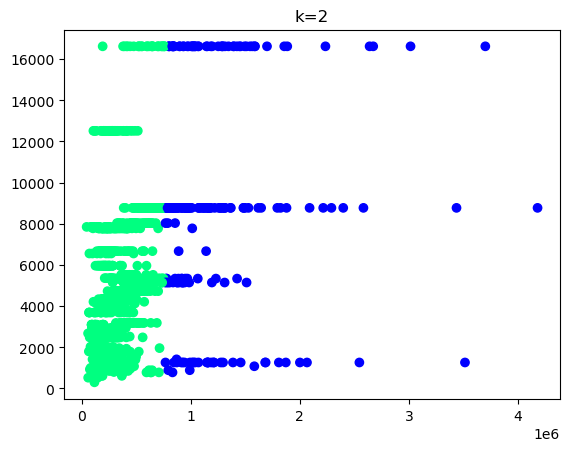

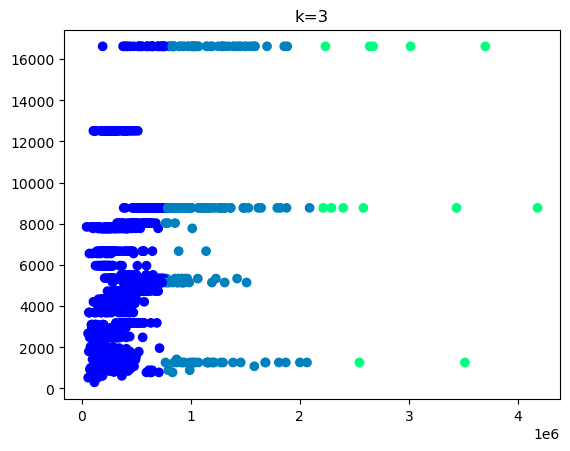

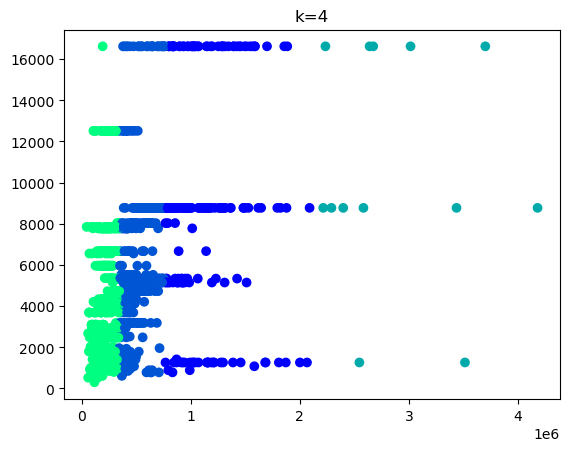

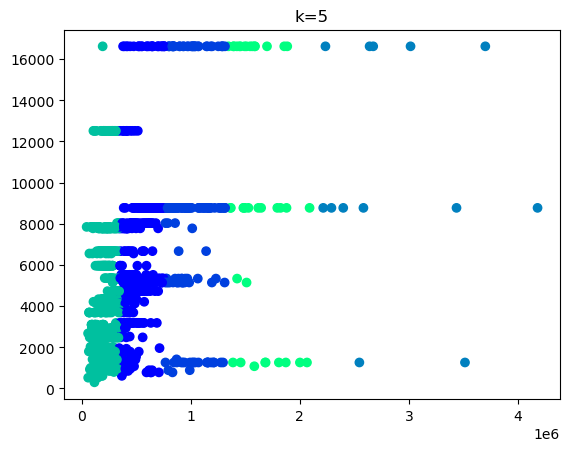

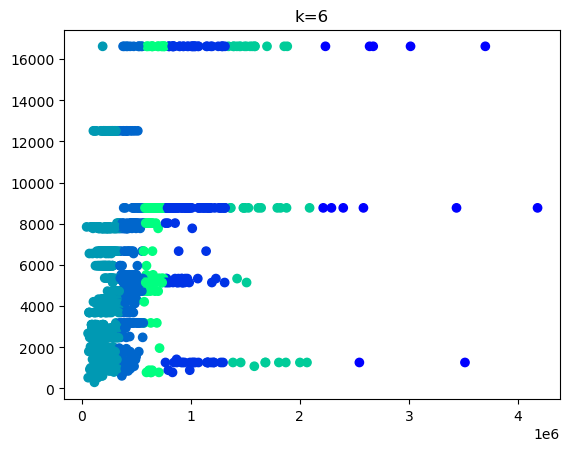

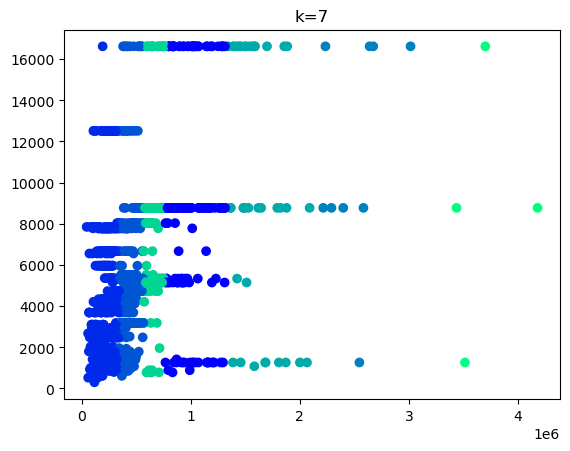

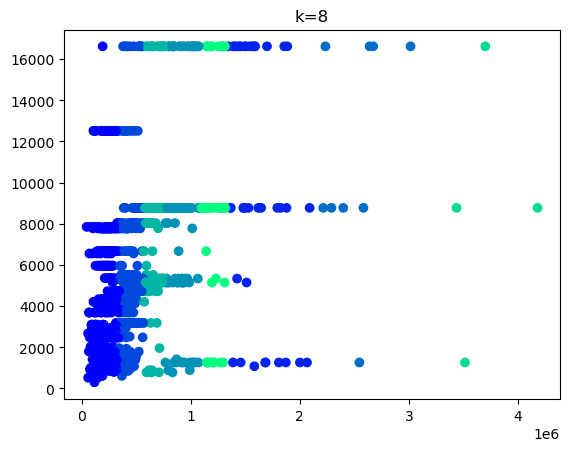

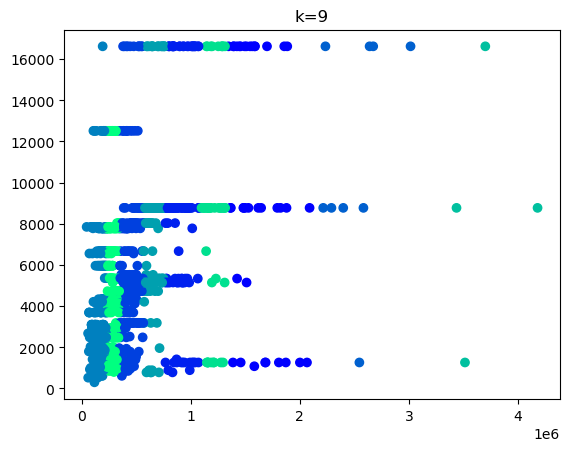

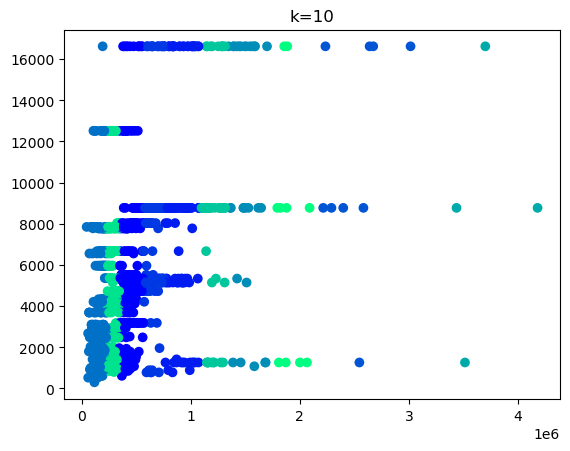

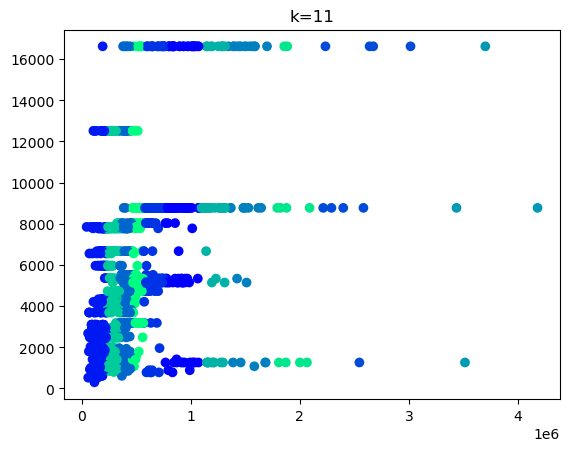

<Figure size 640x480 with 0 Axes>

In [43]:
for k in range(2, 12):
    plt.scatter(df_2019['ZHVI 2019'], df['Sales 2019'],
           c = AgglomerativeClustering(n_clusters = k).fit_predict(df_2019[['ZHVI 2019', 'Sales 2019']]), cmap =plt.cm.winter)
    plt.title(f"k={k}")
    plt.show()
    plt.clf()

In [44]:
for k in range(2, 8):
    print(f"k={k}")
    clusters = AgglomerativeClustering(n_clusters = k).fit_predict(df_2019[['ZHVI 2019', 'Sales 2019']])
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print("==========")

k=2
Cluster 0 count: 201
Cluster 1 count: 1025
k=3
Cluster 0 count: 1025
Cluster 1 count: 188
Cluster 2 count: 13
k=4
Cluster 0 count: 188
Cluster 1 count: 416
Cluster 2 count: 13
Cluster 3 count: 609
k=5
Cluster 0 count: 416
Cluster 1 count: 150
Cluster 2 count: 13
Cluster 3 count: 609
Cluster 4 count: 38
k=6
Cluster 0 count: 13
Cluster 1 count: 150
Cluster 2 count: 287
Cluster 3 count: 609
Cluster 4 count: 38
Cluster 5 count: 129
k=7
Cluster 0 count: 150
Cluster 1 count: 609
Cluster 2 count: 287
Cluster 3 count: 9
Cluster 4 count: 38
Cluster 5 count: 129
Cluster 6 count: 4


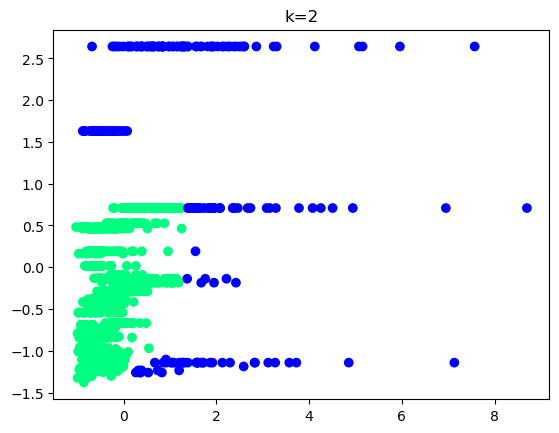

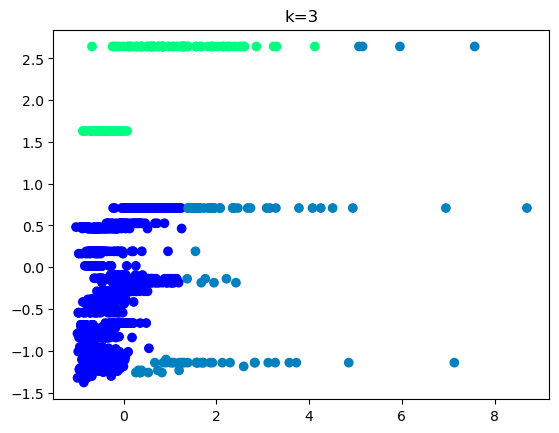

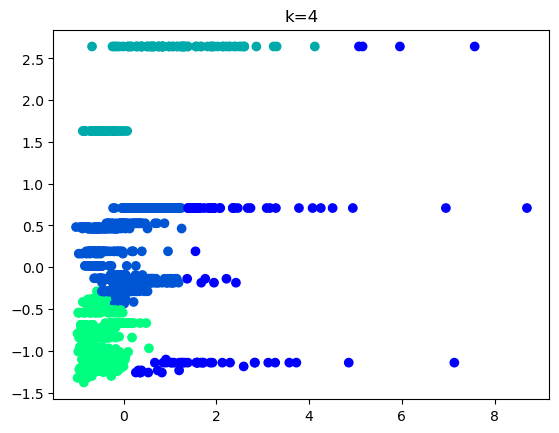

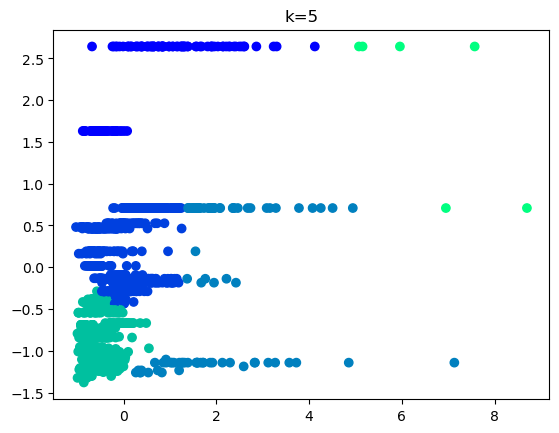

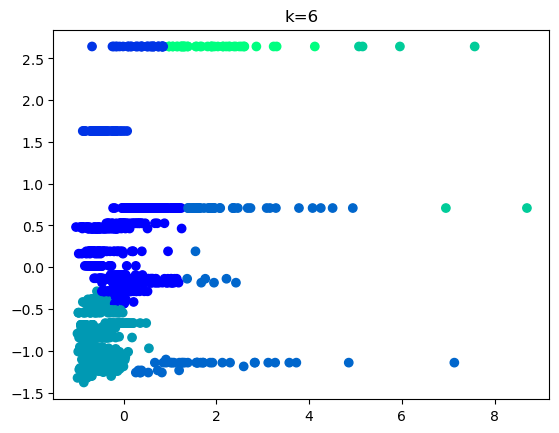

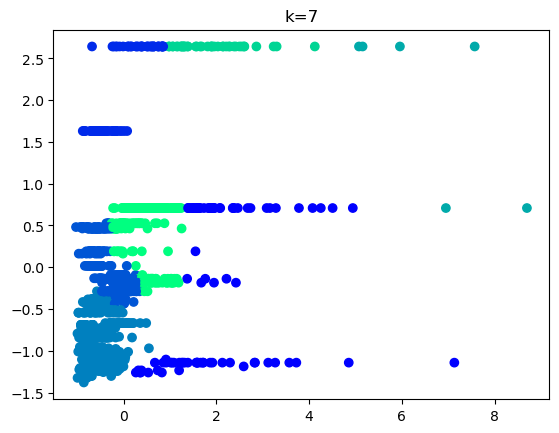

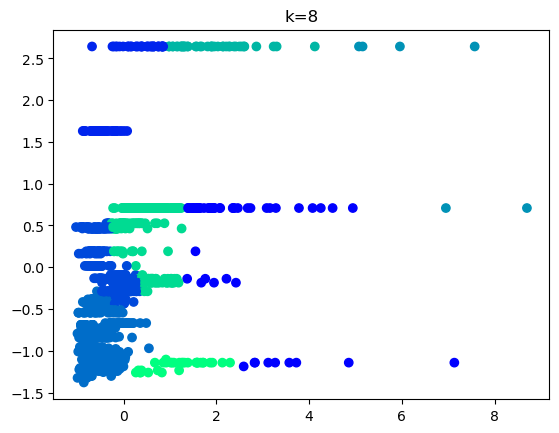

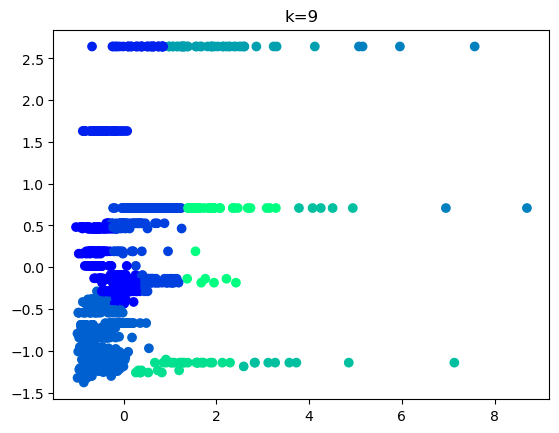

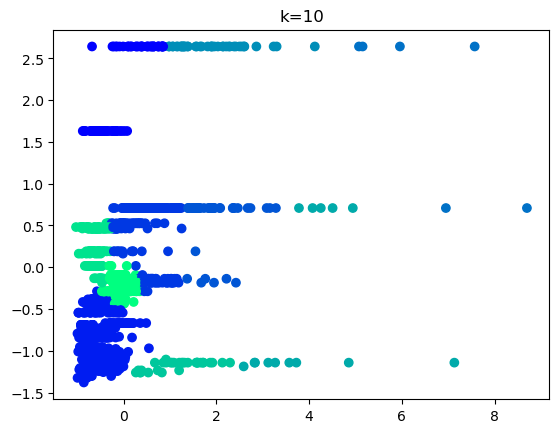

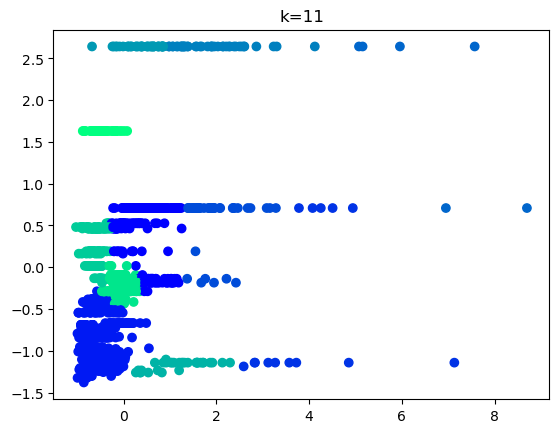

<Figure size 640x480 with 0 Axes>

In [48]:
for k in range(2, 12):
    # Visualizing the clustering

    plt.scatter(zhvi2019_scaled, sales2019_scaled,
            c = AgglomerativeClustering(n_clusters = k).fit_predict(data_scaled), cmap =plt.cm.winter)
    plt.title(f"k={k}")
    plt.show()
    plt.clf()

In [50]:
for k in range(2, 12):
    print(f"k={k}")
    clusters = AgglomerativeClustering(n_clusters = k).fit_predict(data_scaled)
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print("==========")

k=2
Cluster 0 count: 216
Cluster 1 count: 1010
k=3
Cluster 0 count: 1010
Cluster 1 count: 91
Cluster 2 count: 125
k=4
Cluster 0 count: 91
Cluster 1 count: 544
Cluster 2 count: 125
Cluster 3 count: 466
k=5
Cluster 0 count: 125
Cluster 1 count: 544
Cluster 2 count: 85
Cluster 3 count: 466
Cluster 4 count: 6
k=6
Cluster 0 count: 544
Cluster 1 count: 85
Cluster 2 count: 85
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
k=7
Cluster 0 count: 85
Cluster 1 count: 85
Cluster 2 count: 319
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
Cluster 6 count: 225
k=8
Cluster 0 count: 53
Cluster 1 count: 85
Cluster 2 count: 319
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
Cluster 6 count: 225
Cluster 7 count: 32
k=9
Cluster 0 count: 319
Cluster 1 count: 85
Cluster 2 count: 225
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
Cluster 6 count: 14
Cluster 7 count: 32
Cluster 8 count: 39
k=10
Cluster 0 count: 85
Cluster 1 count: 466
Cluster 2 count: 225
Clu

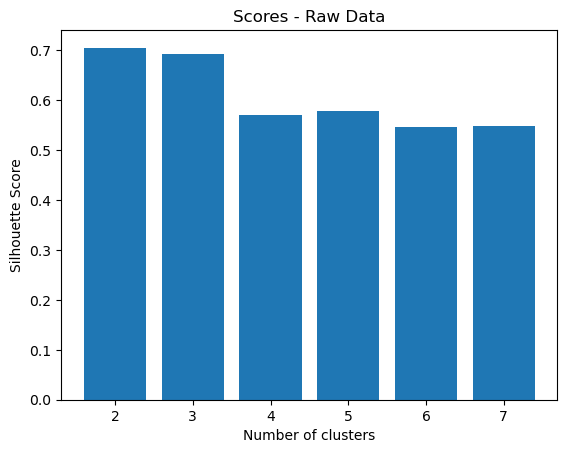

In [53]:
silhouette_scores = []

for k in range(2, 8):
    silhouette_scores.append(
        silhouette_score(df_2019[['ZHVI 2019', 'Sales 2019']], AgglomerativeClustering(n_clusters = k).fit_predict(df_2019[['ZHVI 2019', 'Sales 2019']])))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title("Scores - Raw Data")
plt.show()

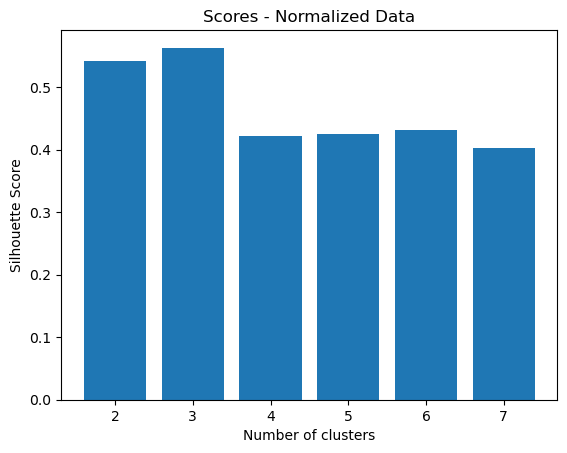

In [54]:
silhouette_scores = []

for k in range(2, 8):
    silhouette_scores.append(
        silhouette_score(data_scaled, AgglomerativeClustering(n_clusters = k).fit_predict(data_scaled)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title("Scores - Normalized Data")
plt.show()